In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [138]:

import warnings
warnings.filterwarnings('ignore')

In [139]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
df=pd.read_excel(r'D:\itvedant\Vscode\Unsuperved\Clustering\University_Clustering.xlsx')

In [141]:
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [143]:
df.drop('State',axis=1,inplace=True)

In [144]:
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81


In [145]:
df.shape

(25, 7)

In [146]:
df.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [147]:
df.duplicated().sum()

0

In [148]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [149]:
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81


In [150]:
df_new=df.drop('Univ',axis=1)

In [151]:
df_new.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81


In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scalar=MinMaxScaler()

In [154]:
for col in df_new:
    df_new[col]=scalar.fit_transform(df_new[[col]])

In [155]:
df_new.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667


In [156]:
from sklearn.cluster import KMeans

In [157]:
model=KMeans(n_clusters=8)

In [158]:
model.fit(df_new)

KMeans()

In [159]:
model.inertia_

1.1560766878891875

In [160]:
wcss=[]
for k in range(1,9):
    model=KMeans(n_clusters=k)
    model.fit(df_new)
    wcss.append(model.inertia_)

In [161]:
k=np.arange(1,9)
wcss

[9.988235196638556,
 4.123452442397178,
 2.967474100484396,
 2.38404490348248,
 1.807171689602733,
 1.6862207705531107,
 1.2640089020956258,
 1.188318106596486]

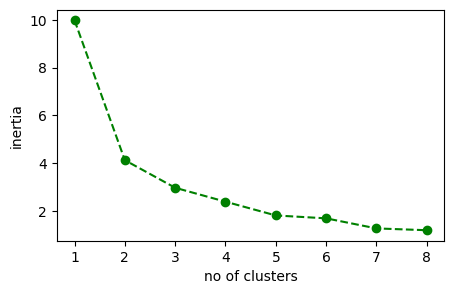

In [162]:
plt.figure(figsize=(5,3))
plt.plot(k,wcss,marker='o',linestyle='--',color='green')
plt.ylabel('inertia')
plt.xlabel('no of clusters')
plt.show()

In [163]:
final_model=KMeans(n_clusters=3)

In [164]:
final_model.fit(df_new)

KMeans(n_clusters=3)

In [165]:
final_model.labels_

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [166]:
df['labels']=final_model.labels_

In [167]:
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2


In [168]:
df['labels'].unique()

array([0, 2, 1])

In [169]:
df.groupby('labels').mean(numeric_only=True)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
labels,,,,,,
0,1309.117647,85.588235,29.647059,11.941176,28360.352941,91.529412
1,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [170]:
df[df['labels']==0]['Univ']

0            Brown
3         Columbia
4          Cornell
5        Dartmouth
6             Duke
7       Georgetown
8          Harvard
10             MIT
11    Northwestern
12       NotreDame
14       Princeton
16        Stanford
18      UCBerkeley
19        UChicago
21           UPenn
22             UVA
24            Yale
Name: Univ, dtype: object

In [171]:
df[df['labels']==1]['Univ']

2            CMU
13     PennState
15        Purdue
17      TexasA&M
20     UMichigan
23    UWisconsin
Name: Univ, dtype: object

In [172]:
df[df['labels']==2]['Univ']

1         CalTech
9    JohnsHopkins
Name: Univ, dtype: object

In [173]:
df[df['labels']==3]['Univ']

Series([], Name: Univ, dtype: object)

In [174]:
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2


# Hierarchical clustering

In [175]:
import scipy

In [176]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [177]:
z=linkage(df_new,metric='euclidean')

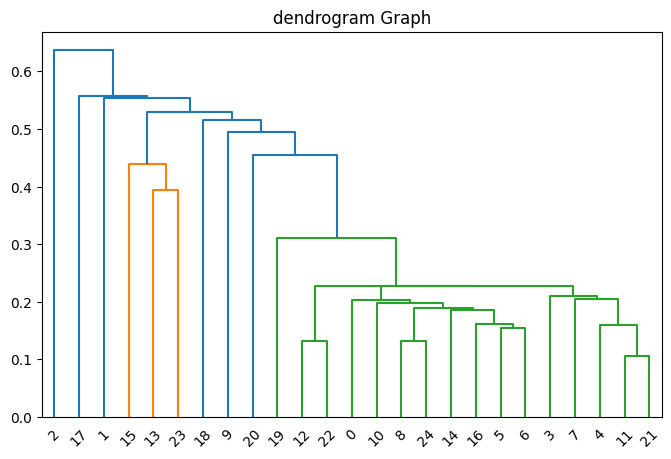

In [178]:
plt.figure(figsize=(8,5))
dendrogram(z)
plt.title("dendrogram Graph")
plt.show()

In [179]:
from sklearn.cluster import AgglomerativeClustering

In [180]:
model=AgglomerativeClustering(n_clusters=3)

In [181]:
model.fit(df_new)

AgglomerativeClustering(n_clusters=3)

In [182]:
model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [183]:
df1=df


In [184]:
df1['labels']=model.labels_

In [185]:
df1.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [186]:
print(df1[df1['labels']==0]['Univ'].tolist())

['Brown', 'CMU', 'Columbia', 'Cornell', 'Georgetown', 'Northwestern', 'NotreDame', 'UCBerkeley', 'UMichigan', 'UPenn', 'UVA']


In [187]:
print(df1[df1['labels']==1]['Univ'].tolist())

['PennState', 'Purdue', 'TexasA&M', 'UWisconsin']


In [188]:
print(df1[df1['labels']==2]['Univ'].tolist())

['CalTech', 'Dartmouth', 'Duke', 'Harvard', 'JohnsHopkins', 'MIT', 'Princeton', 'Stanford', 'UChicago', 'Yale']
